In [574]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder,StandardScaler
import pickle



In [575]:
# Load the dataset
df = pd.read_csv(r"C:\Users\abims\Downloads\FAANG - FAANG.csv.csv")
print(df.isnull().sum())

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                      4982
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company                                23055 non-null  object 
 1   Ticker                                 23055 non-null  object 
 2   Date                                   23055 non-null  object 
 3   Open                                   23055 non-null  float64
 4   High                                   23055 non-null  float64
 5   Low                                    23055 non-null  float64
 6   Close                                  23055 non-null  float64
 7   Adj Close                              23055 non-null  float64
 8   Volume                                 23055 non-null  int64  
 9   Market Cap                             23055 non-null  float64
 10  PE Ratio                               23055 non-null  float64
 11  Be

In [577]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,10/11/2024,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23051,Netflix,NFLX,10/14/2024,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23052,Netflix,NFLX,10/15/2024,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23053,Netflix,NFLX,10/16/2024,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [578]:
# Fill missing numerical values with the mean
df['Open'].fillna(df['Open'].mean(), inplace=True)
df['Close'].fillna(df['Close'].mean(), inplace=True)
df['Volume'].fillna(df['Volume'].mean(), inplace=True)


C:\Users\abims\AppData\Local\Temp\ipykernel_17328\931491602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].fillna(df['Open'].mean(), inplace=True)
C:\Users\abims\AppData\Local\Temp\ipykernel_17328\931491602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [579]:
# Fill missing categorical values with the mode
df['Company'].fillna(df['Company'].mode()[0], inplace=True)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\4132305200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna(df['Company'].mode()[0], inplace=True)


In [580]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,10/11/2024,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23051,Netflix,NFLX,10/14/2024,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23052,Netflix,NFLX,10/15/2024,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23053,Netflix,NFLX,10/16/2024,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [581]:
df.dropna(how='all',axis=1,inplace=True)


In [582]:
df.columns

Index(['Company', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Market Cap', 'PE Ratio', 'Beta', 'EPS',
       'Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
       'Current Ratio', 'Dividends Paid', 'Dividend Yield',
       'Quarterly Revenue Growth', 'Analyst Recommendation', 'Target Price',
       'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Quick Ratio',
       'Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
       'Annual Dividend Rate'],
      dtype='object')

In [583]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [584]:
def convert_volume(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('K'):
            return float(value[:-1]) * 1_000
    return value

if 'Volume' in df.columns:
    df['Volume'] = df['Volume'].apply(convert_volume).astype('int64')

In [585]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
4,Apple,AAPL,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23051,Netflix,NFLX,2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23052,Netflix,NFLX,2024-10-15,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23053,Netflix,NFLX,2024-10-16,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN


In [586]:
# Convert numerical columns to float and int
df['Open'] = df['Open'].astype(float)
df['Close'] = df['Close'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(int)


In [587]:
# Calculate IQR for numerical columns
Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Open'] < (Q1 - 1.5 * IQR)) | (df['Open'] > (Q3 + 1.5 * IQR)))]

In [588]:

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR)))]

In [589]:
Q1 = df['High'].quantile(0.25)
Q3 = df['High'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['High'] < (Q1 - 1.5 * IQR)) | (df['High'] > (Q3 + 1.5 * IQR)))]

In [590]:
Q1 = df['Low'].quantile(0.25)
Q3 = df['Low'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Low'] < (Q1 - 1.5 * IQR)) | (df['Low'] > (Q3 + 1.5 * IQR)))]

In [591]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Volume'] < (Q1 - 1.5 * IQR)) | (df['Volume'] > (Q3 + 1.5 * IQR)))]

In [592]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate
57,Apple,AAPL,2005-03-28,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
101,Apple,AAPL,2005-05-27,1.451429,1.456786,1.428929,1.448571,1.223282,316008000,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
125,Apple,AAPL,2005-07-01,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
129,Apple,AAPL,2005-07-08,1.352500,1.367143,1.338214,1.366071,1.153613,290735200,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
139,Apple,AAPL,2005-07-22,1.551429,1.571429,1.549643,1.571429,1.327033,301106400,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,Netflix,NFLX,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
22528,Netflix,NFLX,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
22537,Netflix,NFLX,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
22547,Netflix,NFLX,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN


In [593]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate
count,18019,18019.000000,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,18019.000000,14649.000000,...,18019.000000,1.801900e+04,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,14649.000000,9764.000000
mean,2015-06-04 06:18:28.829568768,64.054465,64.820130,63.285860,64.077754,63.673503,7.613265e+07,1.870909e+12,35.782666,1.141132,...,360.167194,4.908838e+10,0.260616,0.212732,1.346394,16.273234,1.848712e+12,7.387994e+10,1.141132,1.142114
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,200.200000,2.218148e+10,0.099150,0.073500,0.798000,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000
25%,2011-06-07 00:00:00,13.238154,13.404308,13.090466,13.246497,13.138815,2.531385e+07,1.470000e+12,23.492826,1.038000,...,200.200000,3.201187e+10,0.099150,0.073500,0.840000,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000
50%,2015-08-28 00:00:00,38.950001,39.223999,38.527500,38.924999,38.338501,5.498070e+07,2.000000e+12,35.789955,1.147000,...,218.900000,4.398850e+10,0.296140,0.264410,0.861000,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000
75%,2019-07-22 00:00:00,110.210251,112.138748,108.329998,110.299999,109.794746,1.054710e+08,2.020000e+12,45.496414,1.216000,...,601.580000,5.919100e+10,0.323630,0.267020,1.897000,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,3.209707e+08,3.580000e+12,45.496414,1.239000,...,718.880000,8.615812e+10,0.381050,0.343390,2.688000,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000
std,NaN,60.752327,61.487681,60.020554,60.778979,60.680627,6.771098e+07,9.667978e+11,8.864189,0.078122,...,213.938494,2.054595e+10,0.101877,0.092896,0.685361,16.299556,9.718453e+11,5.788113e+10,0.078122,0.485589


In [594]:
# Calculate Z-scores for numerical columns
df['Open_zscore'] = stats.zscore(df['Open'])
df['Close_zscore'] = stats.zscore(df['Close'])
df['Volume_zscore'] = stats.zscore(df['Volume'])
df['High_zscore']=stats.zscore(df['High'])
df['Low_zscore']=stats.zscore(df['Low'])


In [595]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore
count,18019,18019.000000,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,18019.000000,14649.000000,...,18019.000000,1.801900e+04,1.801900e+04,14649.000000,9764.000000,1.801900e+04,1.801900e+04,1.801900e+04,1.801900e+04,1.801900e+04
mean,2015-06-04 06:18:28.829568768,64.054465,64.820130,63.285860,64.077754,63.673503,7.613265e+07,1.870909e+12,35.782666,1.141132,...,16.273234,1.848712e+12,7.387994e+10,1.141132,1.142114,-1.955875e-16,-5.678348e-17,7.571131e-17,5.047421e-17,-1.135670e-16
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000,-1.032984e+00,-1.033079e+00,-1.102346e+00,-1.032839e+00,-1.033225e+00
25%,2011-06-07 00:00:00,13.238154,13.404308,13.090466,13.246497,13.138815,2.531385e+07,1.470000e+12,23.492826,1.038000,...,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000,-8.364737e-01,-8.363528e-01,-7.505461e-01,-8.362203e-01,-8.363266e-01
50%,2015-08-28 00:00:00,38.950001,39.223999,38.527500,38.924999,38.338501,5.498070e+07,2.000000e+12,35.789955,1.147000,...,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000,-4.132378e-01,-4.138512e-01,-3.123945e-01,-4.162922e-01,-4.125095e-01
75%,2019-07-22 00:00:00,110.210251,112.138748,108.329998,110.299999,109.794746,1.054710e+08,2.020000e+12,45.496414,1.216000,...,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000,7.597580e-01,7.605183e-01,4.332999e-01,7.695839e-01,7.504994e-01
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,3.209707e+08,3.580000e+12,45.496414,1.239000,...,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000,2.775041e+00,2.730662e+00,3.616029e+00,2.736719e+00,2.658899e+00
std,NaN,60.752327,61.487681,60.020554,60.778979,60.680627,6.771098e+07,9.667978e+11,8.864189,0.078122,...,16.299556,9.718453e+11,5.788113e+10,0.078122,0.485589,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00


In [596]:
#Filter values with z-scores greater than 3 or less than -3
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]
df = df[(stats.zscore(df['Open']) < 3) & (stats.zscore(df['Open']) > -3)]
df = df[(stats.zscore(df['High']) < 3) & (stats.zscore(df['High']) > -3)]
df = df[(stats.zscore(df['Low']) < 3) & (stats.zscore(df['Low']) > -3)]
df = df[(stats.zscore(df['Volume']) < 3) & (stats.zscore(df['Volume']) > -3)]

In [597]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore
count,17688,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000,1.768800e+04,1.768800e+04,17688.000000,14319.000000,...,17688.000000,1.768800e+04,1.768800e+04,14319.000000,9475.000000,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000
mean,2015-07-06 20:26:12.862958080,64.958042,65.733950,64.179591,64.982280,64.591245,7.196145e+07,1.853356e+12,35.843060,1.140824,...,15.999184,1.831359e+12,7.373549e+10,1.140824,1.148982,0.014874,0.014883,-0.061605,0.014862,0.014891
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000,-1.032984,-1.033079,-1.102346,-1.032839,-1.033225
25%,2011-07-29 00:00:00,13.471292,13.612801,13.296198,13.462535,13.362620,2.489530e+07,1.470000e+12,23.492826,1.038000,...,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000,-0.832636,-0.832798,-0.756728,-0.832829,-0.832899
50%,2015-10-08 00:00:00,40.203999,40.549250,39.951750,40.283499,39.776234,5.366180e+07,2.000000e+12,35.789955,1.147000,...,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000,-0.392596,-0.391499,-0.331873,-0.394738,-0.388779
75%,2019-08-15 06:00:00,112.475000,114.257500,110.879374,112.692501,112.210537,1.017592e+08,2.020000e+12,45.496414,1.216000,...,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000,0.797037,0.799883,0.378480,0.804043,0.792976
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,2.792244e+08,3.580000e+12,45.496414,1.239000,...,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000,2.775041,2.730662,2.999475,2.736719,2.658899
std,NaN,60.921155,61.658676,60.187432,60.948087,60.839551,6.099670e+07,9.610658e+11,8.876619,0.077726,...,16.014151,9.660654e+11,5.809857e+10,0.077726,0.491019,1.002807,1.002810,0.900864,1.002809,1.002808


In [598]:
df_am=df[df['Company']=='Amazon']
df_am

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore
13091,Amazon,AMZN,2005-01-03,2.247500,2.272000,2.210500,2.226000,2.226000,208930000,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,-1.017388,-1.017679,1.961292,-1.017275,-1.017602
13093,Amazon,AMZN,2005-01-05,2.078500,2.138000,2.078000,2.088500,2.088500,167084000,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,-1.020170,-1.019941,1.343266,-1.019454,-1.019810
13094,Amazon,AMZN,2005-01-06,2.090500,2.112500,2.045000,2.052500,2.052500,174018000,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,-1.019972,-1.020533,1.445675,-1.019869,-1.020360
13095,Amazon,AMZN,2005-01-07,2.069000,2.134500,2.058000,2.116000,2.116000,196732000,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,-1.020326,-1.019489,1.781139,-1.019511,-1.020143
13096,Amazon,AMZN,2005-01-10,2.097000,2.148000,2.085500,2.092000,2.092000,146958000,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,-1.019865,-1.019883,1.046024,-1.019291,-1.019685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,Amazon,AMZN,2024-10-11,186.630005,189.929993,186.300003,188.820007,188.820007,25751600,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,2.017683,2.052448,-0.744081,2.034771,2.049590
18069,Amazon,AMZN,2024-10-14,189.779999,189.830002,187.360001,187.539993,187.539993,22614400,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,2.069534,2.031388,-0.790414,2.033144,2.067252
18070,Amazon,AMZN,2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,2.034144,2.033856,-0.649156,2.010050,2.020933
18071,Amazon,AMZN,2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,2.000000e+12,...,8.437223,2.040000e+12,1.580000e+11,1.147,NaN,2.024597,2.020693,-0.777973,1.999804,2.038094


In [599]:
# One-hot encode the 'Company' column
df = pd.get_dummies(df, columns=['Company'])

In [600]:
df_ama=df[df['Company_Amazon']==True]
df_ama

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Amazon,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
13091,AMZN,2005-01-03,2.247500,2.272000,2.210500,2.226000,2.226000,208930000,2.000000e+12,45.496414,...,-1.017388,-1.017679,1.961292,-1.017275,-1.017602,True,False,False,False,False
13093,AMZN,2005-01-05,2.078500,2.138000,2.078000,2.088500,2.088500,167084000,2.000000e+12,45.496414,...,-1.020170,-1.019941,1.343266,-1.019454,-1.019810,True,False,False,False,False
13094,AMZN,2005-01-06,2.090500,2.112500,2.045000,2.052500,2.052500,174018000,2.000000e+12,45.496414,...,-1.019972,-1.020533,1.445675,-1.019869,-1.020360,True,False,False,False,False
13095,AMZN,2005-01-07,2.069000,2.134500,2.058000,2.116000,2.116000,196732000,2.000000e+12,45.496414,...,-1.020326,-1.019489,1.781139,-1.019511,-1.020143,True,False,False,False,False
13096,AMZN,2005-01-10,2.097000,2.148000,2.085500,2.092000,2.092000,146958000,2.000000e+12,45.496414,...,-1.019865,-1.019883,1.046024,-1.019291,-1.019685,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,AMZN,2024-10-11,186.630005,189.929993,186.300003,188.820007,188.820007,25751600,2.000000e+12,45.496414,...,2.017683,2.052448,-0.744081,2.034771,2.049590,True,False,False,False,False
18069,AMZN,2024-10-14,189.779999,189.830002,187.360001,187.539993,187.539993,22614400,2.000000e+12,45.496414,...,2.069534,2.031388,-0.790414,2.033144,2.067252,True,False,False,False,False
18070,AMZN,2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,2.000000e+12,45.496414,...,2.034144,2.033856,-0.649156,2.010050,2.020933,True,False,False,False,False
18071,AMZN,2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,2.000000e+12,45.496414,...,2.024597,2.020693,-0.777973,1.999804,2.038094,True,False,False,False,False


In [601]:
from sklearn.preprocessing import LabelEncoder


In [602]:
label_encoder = LabelEncoder()
df['Ticker'] = label_encoder.fit_transform(df['Ticker'])

In [603]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Amazon,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
57,0,2005-03-28,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,35.789955,...,-1.029251,-1.029312,2.943152,-1.029273,-1.029161,False,True,False,False,False
125,0,2005-07-01,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,35.789955,...,-1.032732,-1.032856,2.567870,-1.032752,-1.032838,False,True,False,False,False
141,0,2005-07-26,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,35.789955,...,-1.028511,-1.028666,2.842456,-1.028605,-1.028631,False,True,False,False,False
143,0,2005-07-28,1.566071,1.571429,1.546429,1.564286,1.321001,251311200,3.580000e+12,35.789955,...,-1.028605,-1.028566,2.587223,-1.028669,-1.028667,False,True,False,False,False
147,0,2005-08-03,1.542500,1.546786,1.527500,1.543571,1.303507,258322400,3.580000e+12,35.789955,...,-1.028993,-1.028907,2.690772,-1.029070,-1.028982,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,4,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,42.824500,...,2.673972,2.534701,-1.006254,2.648895,2.573092,False,False,False,False,True
22528,4,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,42.824500,...,2.564015,2.633257,-1.002854,2.653936,2.541102,False,False,False,False,True
22537,4,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,42.824500,...,2.709034,2.637206,-1.009768,2.696873,2.623077,False,False,False,False,True
22547,4,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,42.824500,...,2.666565,2.471519,-0.898701,2.693620,2.506113,False,False,False,False,True


In [604]:
print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

               Open          High           Low         Close        Volume
count  17688.000000  17688.000000  17688.000000  17688.000000  1.768800e+04
mean      64.958042     65.733950     64.179591     64.982280  7.196145e+07
std       60.921155     61.658676     60.187432     60.948087  6.099670e+07
min        1.300000      1.315000      1.272857      1.290000  1.493800e+06
25%       13.471292     13.612801     13.296198     13.462535  2.489530e+07
50%       40.203999     40.549250     39.951750     40.283499  5.366180e+07
75%      112.475000    114.257500    110.879374    112.692501  1.017592e+08
max      232.639999    233.089996    222.869995    230.039993  2.792244e+08


In [605]:

import matplotlib.pyplot as plt


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17688 entries, 57 to 22548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Ticker                    17688 non-null  int64         
 1   Date                      17688 non-null  datetime64[ns]
 2   Open                      17688 non-null  float64       
 3   High                      17688 non-null  float64       
 4   Low                       17688 non-null  float64       
 5   Close                     17688 non-null  float64       
 6   Adj Close                 17688 non-null  float64       
 7   Volume                    17688 non-null  int64         
 8   Market Cap                17688 non-null  float64       
 9   PE Ratio                  17688 non-null  float64       
 10  Beta                      14319 non-null  float64       
 11  EPS                       17688 non-null  float64       
 12  Forward PE            

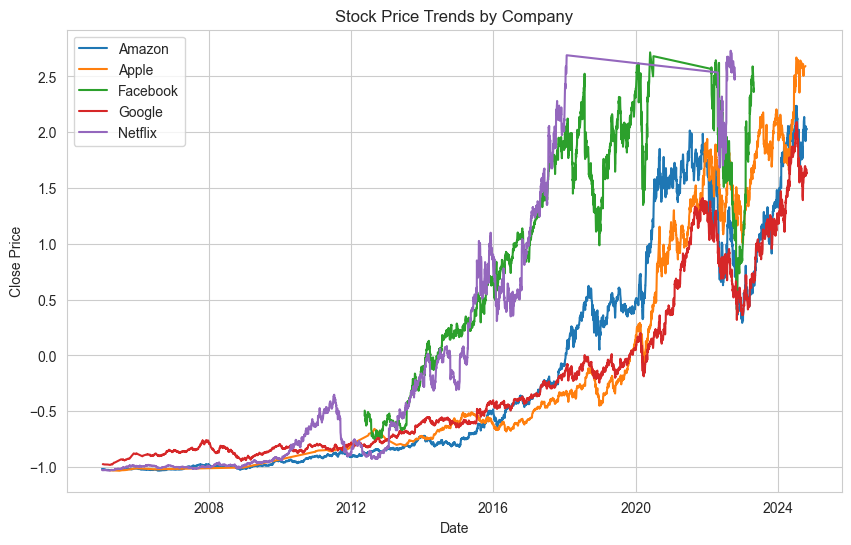

In [607]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

company_columns = [col for col in df.columns if col.startswith("Company_")]

for company in company_columns:
    subset = df[df[company] == True]  # Select rows where the company column is True
    plt.plot(subset['Date'], subset['Close_zscore'], label=company.replace("Company_", ""))

plt.title('Stock Price Trends by Company')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


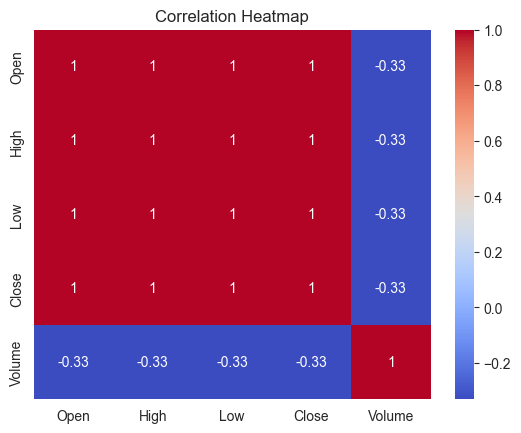

In [608]:
#Heat Map
import seaborn as sns
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

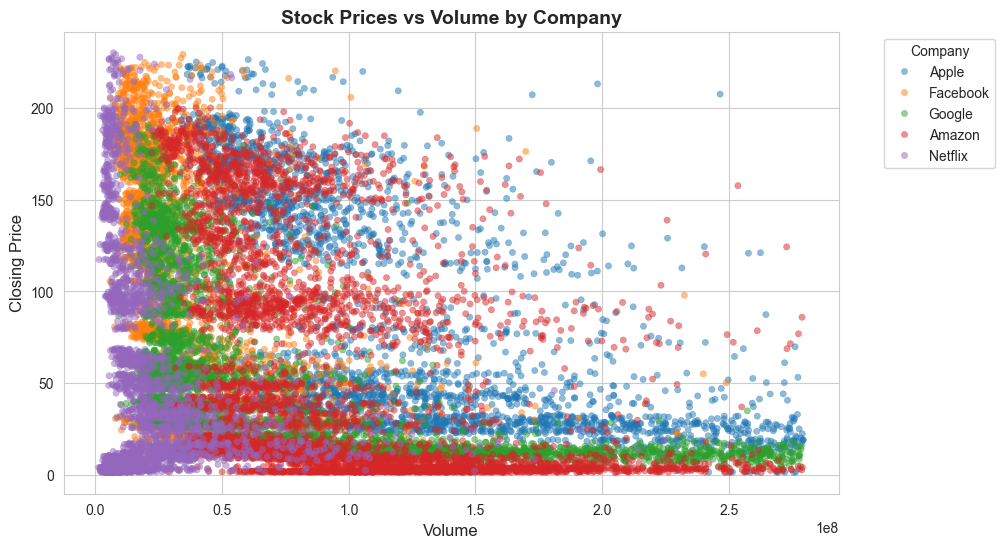

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert one-hot encoded company columns into a single categorical column
company_columns = ['Company_Amazon', 'Company_Apple', 'Company_Facebook', 'Company_Google', 'Company_Netflix']
df['Company'] = df[company_columns].idxmax(axis=1).str.replace('Company_', '')  # Extract company name

plt.figure(figsize=(10, 6))  # Set figure size
plt.title("Stock Prices vs Volume by Company", fontsize=14, fontweight='bold')  # Improved title

sns.set_style("whitegrid")  # Improve background style

# Scatter plot with color coding by company
sns.scatterplot(x='Volume', y='Close', hue='Company', data=df, 
                alpha=0.5,  # Reduce marker opacity to handle overplotting
                s=20,  # Adjust marker size
                edgecolor=None)  # Remove edge color for better clarity

plt.xlabel("Volume", fontsize=12)  # Improved X-axis label
plt.ylabel("Closing Price", fontsize=12)  # Improved Y-axis label
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot

plt.show()  # Display the plot


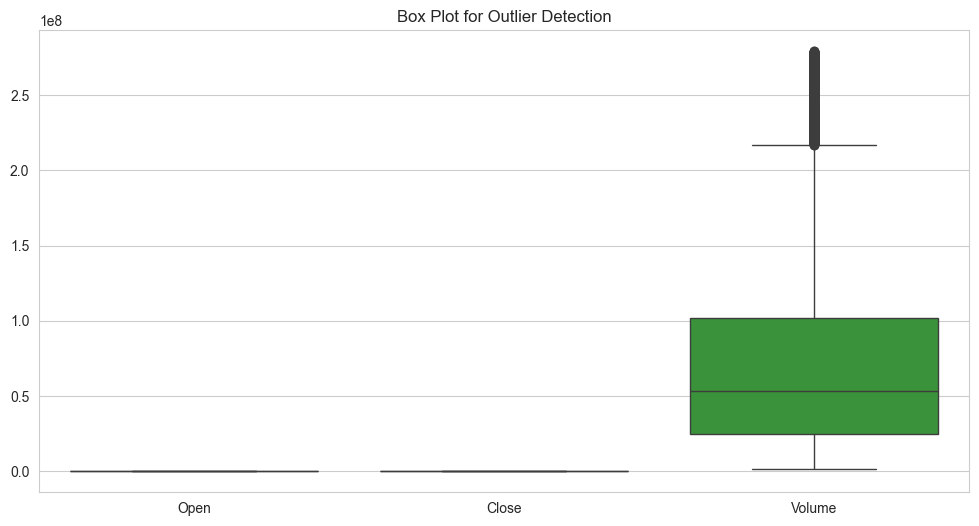

In [610]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'Close', 'Volume']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [611]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]

In [612]:
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [613]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [614]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [615]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [616]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [617]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

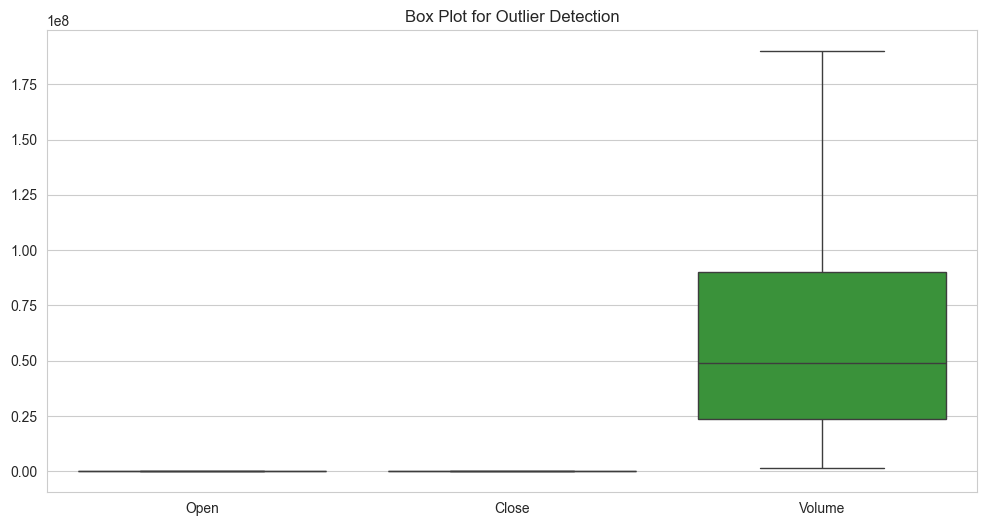

In [618]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'Close', 'Volume']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [619]:
print(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999860  0.999849  0.999699 -0.282776
High    0.999860  1.000000  0.999788  0.999851 -0.281887
Low     0.999849  0.999788  1.000000  0.999854 -0.284002
Close   0.999699  0.999851  0.999854  1.000000 -0.283002
Volume -0.282776 -0.281887 -0.284002 -0.283002  1.000000


In [620]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Amazon,Company_Apple,Company_Facebook,Company_Google,Company_Netflix,Company
150,0,2005-08-08,1.535714,1.544643,1.521786,1.523214,1.286316,176383200,3.580000e+12,35.789955,...,-1.029242,1.480607,-1.029104,-1.029077,False,True,False,False,False,Apple
1507,0,2010-12-28,11.639643,11.666429,11.609286,11.623929,9.816119,175924000,3.580000e+12,35.789955,...,-0.863050,1.473825,-0.864485,-0.861005,False,True,False,False,False,Apple
1508,0,2010-12-29,11.650714,11.658929,11.610714,11.617500,9.810692,163139200,3.580000e+12,35.789955,...,-0.863155,1.285005,-0.864607,-0.860981,False,True,False,False,False,Apple
1509,0,2010-12-30,11.624286,11.625357,11.537500,11.559286,9.761531,157494400,3.580000e+12,35.789955,...,-0.864113,1.201637,-0.865153,-0.862201,False,True,False,False,False,Apple
1762,0,2011-12-30,14.411071,14.510000,14.410357,14.464286,12.214729,179662000,3.580000e+12,35.789955,...,-0.816316,1.529031,-0.818237,-0.814335,False,True,False,False,False,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,4,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,42.824500,...,2.534701,-1.006254,2.648895,2.573092,False,False,False,False,True,Netflix
22528,4,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,42.824500,...,2.633257,-1.002854,2.653936,2.541102,False,False,False,False,True,Netflix
22537,4,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,42.824500,...,2.637206,-1.009768,2.696873,2.623077,False,False,False,False,True,Netflix
22547,4,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,42.824500,...,2.471519,-0.898701,2.693620,2.506113,False,False,False,False,True,Netflix


<Figure size 1000x500 with 0 Axes>

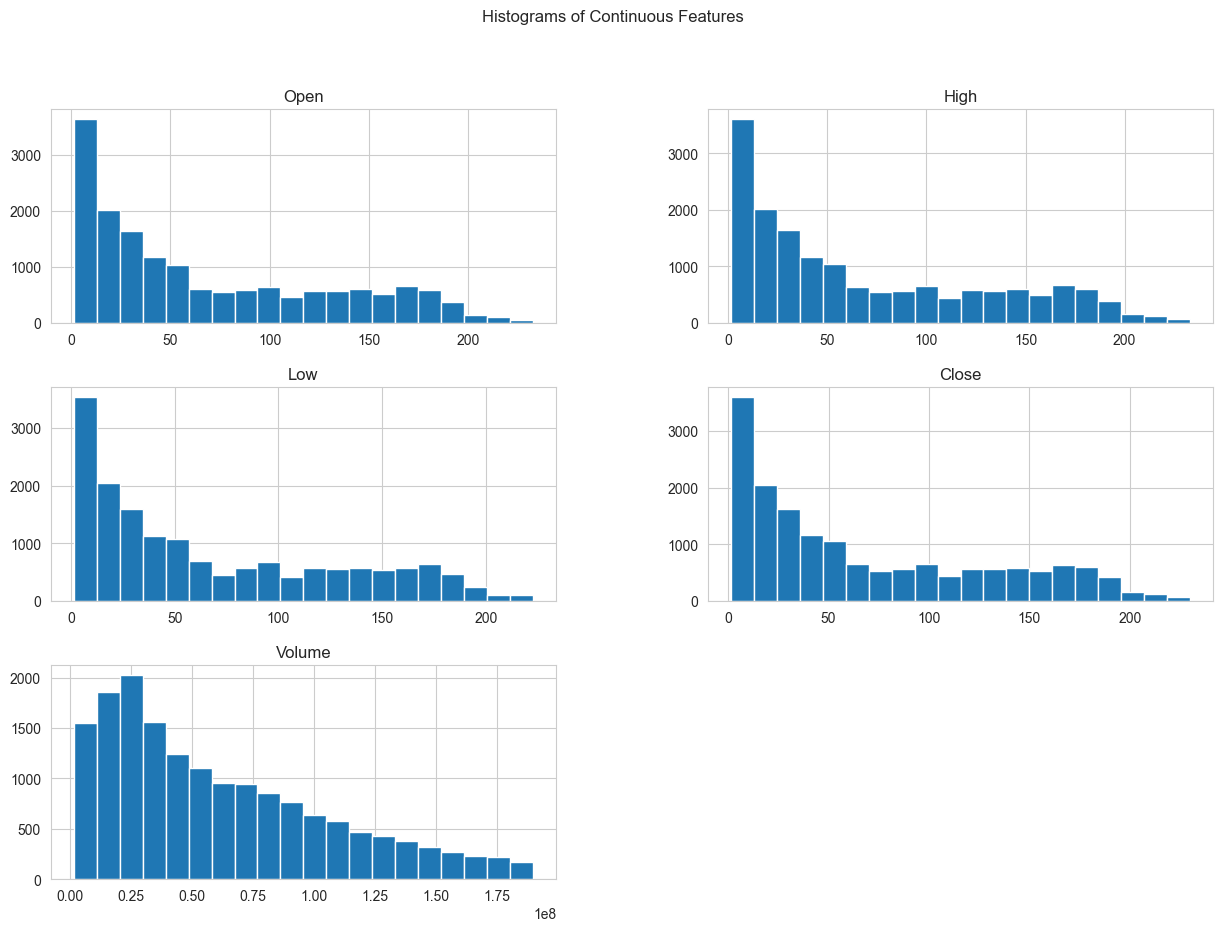


Most strongly correlated features with Close Price:


In [621]:
# Continuous Feature Analysis
plt.figure(figsize=(10, 5))
df.hist(column=['Open', 'High', 'Low', 'Close', 'Volume'], bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Features')
plt.show()

print("\nMost strongly correlated features with Close Price:")

In [622]:
df_amazon=df[df['Company_Amazon']==True]
df_Apple=df[df['Company_Apple']== True]
df_google=df[df['Company_Google']==True]
df_netflix=df[df['Company_Netflix']==True]
df_facebook=df[df['Company_Facebook']==True]

In [623]:
from sklearn.model_selection import train_test_split

In [624]:
# Train-test split_amazon (80% train, 20% test)
X_amazon = df_amazon[['Open', 'High', 'Low', 'Volume']]
y_amazon = df_amazon['Close']
df_amazon.sort_values('Date', inplace=True)
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(X_amazon, y_amazon, test_size=0.2, shuffle=False)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\1031449623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon.sort_values('Date', inplace=True)


In [625]:
# Train-test split_Apple (80% train, 20% test)
X_Apple = df_Apple[['Open', 'High', 'Low', 'Volume']]
y_Apple = df_Apple['Close']
df_Apple.sort_values('Date', inplace=True)
X_train_Apple, X_test_Apple, y_train_Apple, y_test_Apple = train_test_split(X_Apple, y_Apple, test_size=0.2, shuffle=False)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\658029973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Apple.sort_values('Date', inplace=True)


In [626]:
# Train-test split_Facebook (80% train, 20% test)
X_Facebook =df_facebook[['Open', 'High', 'Low', 'Volume']]
y_Facebook =df_facebook['Close']
df_facebook.sort_values('Date', inplace=True)
X_train_Facebook, X_test_Facebook, y_train_Facebook, y_test_Facebook = train_test_split(X_Facebook, y_Facebook, test_size=0.2, shuffle=False)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\2836017773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_facebook.sort_values('Date', inplace=True)


In [627]:
# Train-test split_Netflix (80% train, 20% test)
X_netflix =df_netflix[['Open', 'High', 'Low', 'Volume']]
y_netflix =df_netflix['Close']
df_netflix.sort_values('Date', inplace=True)
X_train_netflix, X_test_netflix, y_train_netflix, y_test_netflix = train_test_split(X_netflix, y_netflix, test_size=0.2, shuffle=False)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\3929311293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix.sort_values('Date', inplace=True)


In [628]:
# Train-test split_Google (80% train, 20% test)
X_google =df_google[['Open', 'High', 'Low', 'Volume']]
y_google =df_google['Close']
df_google.sort_values('Date', inplace=True)
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X_google, y_google, test_size=0.2, shuffle=False)

C:\Users\abims\AppData\Local\Temp\ipykernel_17328\3322662773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google.sort_values('Date', inplace=True)


In [629]:
# Select numerical columns to scale amazon
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale_amazon = df_amazon[numerical_features]

# Min-Max Scaling_amazon
minmax_scaler_amazon = MinMaxScaler()
scaled_minmax_amazon = minmax_scaler_amazon.fit_transform(data_to_scale_amazon)

# Save the Min-Max scaler using pickle
with open('minmax_scaler_amazon.pkl', 'wb') as file:
    pickle.dump(minmax_scaler_amazon, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler_amazon = StandardScaler()
scaled_standard_amazon = standard_scaler_amazon.fit_transform(data_to_scale_amazon)

# Save the Standard scaler using pickle
with open('standard_scaler_amazon.pkl', 'wb') as file:
    pickle.dump(standard_scaler_amazon, file)


Min-Max Scaler saved successfully!


In [630]:
# Select numerical columns to scale apple
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale_Apple = df_Apple[numerical_features]

# Min-Max Scaling_Apple
minmax_scaler_Apple = MinMaxScaler()
scaled_minmax_Apple = minmax_scaler_Apple.fit_transform(data_to_scale_Apple)

# Save the Min-Max scaler using pickle
with open('minmax_scaler_Apple.pkl', 'wb') as file:
    pickle.dump(minmax_scaler_Apple, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler_Apple = StandardScaler()
scaled_standard_Apple = standard_scaler_Apple.fit_transform(data_to_scale_Apple)

# Save the Standard scaler using pickle
with open('standard_scaler_Apple.pkl', 'wb') as file:
    pickle.dump(standard_scaler_Apple, file)

Min-Max Scaler saved successfully!


In [631]:
# Select numerical columns to scale FB
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale_Facebook = df_facebook[numerical_features]

# Min-Max Scaling_Apple
minmax_scaler_Facebook = MinMaxScaler()
scaled_minmax_Facebook = minmax_scaler_Facebook.fit_transform(data_to_scale_Facebook)

# Save the Min-Max scaler using pickle
with open('minmax_scaler_Facebook.pkl', 'wb') as file:
    pickle.dump(minmax_scaler_Facebook, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler_Facebook = StandardScaler()
scaled_standard_Facebook = standard_scaler_Facebook.fit_transform(data_to_scale_Facebook)

# Save the Standard scaler using pickle
with open('standard_scaler_Facebook.pkl', 'wb') as file:
    pickle.dump(standard_scaler_Facebook, file)

Min-Max Scaler saved successfully!


In [632]:
# Select numerical columns to scale NF
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale_netflix = df_netflix[numerical_features]

# Min-Max Scaling_Apple
minmax_scaler_netflix = MinMaxScaler()
scaled_minmax_netflix = minmax_scaler_netflix.fit_transform(data_to_scale_netflix)

# Save the Min-Max scaler using pickle
with open('minmax_scaler_netflix.pkl', 'wb') as file:
    pickle.dump(minmax_scaler_netflix, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler_netflix = StandardScaler()
scaled_standard_netflix = standard_scaler_netflix.fit_transform(data_to_scale_netflix)

# Save the Standard scaler using pickle
with open('standard_scaler_netflix.pkl', 'wb') as file:
    pickle.dump(standard_scaler_netflix, file)

Min-Max Scaler saved successfully!


In [633]:
# Select numerical columns to scale GG
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale_google = df_google[numerical_features]

# Min-Max Scaling_Apple
minmax_scaler_google = MinMaxScaler()
scaled_minmax_google = minmax_scaler_google.fit_transform(data_to_scale_google)

# Save the Min-Max scaler using pickle
with open('minmax_scaler_google.pkl', 'wb') as file:
    pickle.dump(minmax_scaler_google, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler_google = StandardScaler()
scaled_standard_google = standard_scaler_google.fit_transform(data_to_scale_google)

# Save the Standard scaler using pickle
with open('standard_scaler_google.pkl', 'wb') as file:
    pickle.dump(standard_scaler_google, file)

Min-Max Scaler saved successfully!


In [634]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor








In [635]:
# Model training_amazon
lr_model_amazon = LinearRegression()
lr_model_amazon.fit(X_train_amazon, y_train_amazon)

# Predictions
y_pred_lr_amazon = lr_model_amazon.predict(X_test_amazon)

# Evaluation
print("Linear Regression Amazon:")
print("MSE Amazon:", mean_squared_error(y_test_amazon, y_pred_lr_amazon))
print("R2 Score Amazon:", r2_score(y_test_amazon, y_pred_lr_amazon))


Linear Regression Amazon:
MSE Amazon: 1.0610216349144501
R2 Score Amazon: 0.9988445164199647


In [636]:
# Model training_Apple
lr_model_Apple = LinearRegression()
lr_model_Apple.fit(X_train_Apple, y_train_Apple)

# Predictions
y_pred_lr_Apple = lr_model_Apple.predict(X_test_Apple)

# Evaluation
print("Linear Regression Apple:")
print("MSE Apple:", mean_squared_error(y_test_Apple, y_pred_lr_Apple))
print("R2 Score Apple:", r2_score(y_test_Apple, y_pred_lr_Apple))

Linear Regression Apple:
MSE Apple: 0.825328630572437
R2 Score Apple: 0.998290275802777


In [637]:
# Model training_FB
lr_model_Facebook = LinearRegression()
lr_model_Facebook.fit(X_train_Facebook, y_train_Facebook)

# Predictions
y_pred_lr_Facebook = lr_model_Facebook.predict(X_test_Facebook)

# Evaluation
print("Linear Regression Facebook:")
print("MSE Facebook:", mean_squared_error(y_test_Facebook, y_pred_lr_Facebook))
print("R2 Score Facebook:", r2_score(y_test_Facebook, y_pred_lr_Facebook))

Linear Regression Facebook:
MSE Facebook: 3.2850409171181187
R2 Score Facebook: 0.9969449433083866


In [638]:
# Model training_NF
lr_model_netflix = LinearRegression()
lr_model_netflix.fit(X_train_netflix, y_train_netflix)

# Predictions
y_pred_lr_netflix = lr_model_netflix.predict(X_test_netflix)

# Evaluation
print("Linear Regression netflix:")
print("MSE netflix:", mean_squared_error(y_test_netflix, y_pred_lr_netflix))
print("R2 Score netflix:", r2_score(y_test_netflix, y_pred_lr_netflix))

Linear Regression netflix:
MSE netflix: 2.145065181185079
R2 Score netflix: 0.9987028694747325


In [639]:
# Model training_GG
lr_model_google = LinearRegression()
lr_model_google.fit(X_train_google, y_train_google)

# Predictions
y_pred_lr_google = lr_model_google.predict(X_test_google)

# Evaluation
print("Linear Regression google:")
print("MSE google:", mean_squared_error(y_test_google, y_pred_lr_google))
print("R2 Score google:", r2_score(y_test_google, y_pred_lr_google))

Linear Regression google:
MSE google: 0.7091427270904654
R2 Score google: 0.9987403718333576


In [640]:
dt_model_amazon = DecisionTreeRegressor()
dt_model_amazon.fit(X_train_amazon, y_train_amazon)

y_pred_dt_amazon = dt_model_amazon.predict(X_test_amazon)
print("\nDecision Tree Amazon:")
print("MSE Amazon:", mean_squared_error(y_test_amazon, y_pred_dt_amazon))
print("R2 Score Amazon:", r2_score(y_test_amazon, y_pred_dt_amazon))



Decision Tree Amazon:
MSE Amazon: 19.58733173381704
R2 Score Amazon: 0.9786688230943051


In [641]:
dt_model_Apple = DecisionTreeRegressor()
dt_model_Apple.fit(X_train_Apple, y_train_Apple)

y_pred_dt_Apple = dt_model_Apple.predict(X_test_Apple)
print("\nDecision Tree Apple:")
print("MSE Apple:", mean_squared_error(y_test_Apple, y_pred_dt_Apple))
print("R2 Score Apple:", r2_score(y_test_Apple, y_pred_dt_Apple))



Decision Tree Apple:
MSE Apple: 192.820282649077
R2 Score Apple: 0.6005597155500921


In [642]:
#DecisionTreeRegressor_FB
dt_model_Facebook = DecisionTreeRegressor()
dt_model_Facebook.fit(X_train_Facebook, y_train_Facebook)

y_pred_dt_Facebook = dt_model_Facebook.predict(X_test_Facebook)
print("\nDecision Tree Facebook:")
print("MSE Facebook:", mean_squared_error(y_test_Facebook, y_pred_dt_Facebook))
print("R2 Score Facebook:", r2_score(y_test_Facebook, y_pred_dt_Facebook))


Decision Tree Facebook:
MSE Facebook: 11.879056243585255
R2 Score Facebook: 0.9889525910992748


In [643]:
#DecisionTreeRegressor_NF
dt_model_netflix = DecisionTreeRegressor()
dt_model_netflix.fit(X_train_netflix, y_train_netflix)

y_pred_dt_netflix = dt_model_netflix.predict(X_test_netflix)
print("\nDecision Tree netflix:")
print("MSE netflix:", mean_squared_error(y_test_netflix, y_pred_dt_netflix))
print("R2 Score netflix:", r2_score(y_test_netflix, y_pred_dt_netflix))


Decision Tree netflix:
MSE netflix: 1684.5872771784757
R2 Score netflix: -0.018677473706509407


In [644]:
#DecisionTreeRegressor_GG
dt_model_google = DecisionTreeRegressor()
dt_model_google.fit(X_train_google, y_train_google)

y_pred_dt_google = dt_model_google.predict(X_test_google)
print("\nDecision Tree google:")
print("MSE google:", mean_squared_error(y_test_google, y_pred_dt_google))
print("R2 Score google:", r2_score(y_test_google, y_pred_dt_google))


Decision Tree google:
MSE google: 388.8911295233382
R2 Score google: 0.30922478396583797


In [645]:
rf_model_amazon = RandomForestRegressor(n_estimators=100)
rf_model_amazon.fit(X_train_amazon, y_train_amazon)

y_pred_rf_amazon = rf_model_amazon.predict(X_test_amazon)
print("\nRandom Forest _amazon:")
print("MSE _amazon:", mean_squared_error(y_test_amazon, y_pred_rf_amazon))
print("R2 Score _amazon:", r2_score(y_test_amazon, y_pred_rf_amazon))


Random Forest _amazon:
MSE _amazon: 21.87275683485391
R2 Score _amazon: 0.9761799283434818


In [646]:
rf_model_Apple = RandomForestRegressor(n_estimators=100)
rf_model_Apple.fit(X_train_Apple, y_train_Apple)

y_pred_rf_Apple = rf_model_Apple.predict(X_test_Apple)
print("\nRandom Forest _Apple:")
print("MSE _Apple:", mean_squared_error(y_test_Apple, y_pred_rf_Apple))
print("R2 Score _Apple:", r2_score(y_test_Apple, y_pred_rf_Apple))


Random Forest _Apple:
MSE _Apple: 200.74127634350018
R2 Score _Apple: 0.5841508402442479


In [647]:
#RandomForestRegressor_FB
rf_model_Facebook = RandomForestRegressor(n_estimators=100)
rf_model_Facebook.fit(X_train_Facebook, y_train_Facebook)

y_pred_rf_Facebook = rf_model_Facebook.predict(X_test_Facebook)
print("\nRandom Forest _Facebook:")
print("MSE _Facebook:", mean_squared_error(y_test_Facebook, y_pred_rf_Facebook))
print("R2 Score _Facebook:", r2_score(y_test_Facebook, y_pred_rf_Facebook))


Random Forest _Facebook:
MSE _Facebook: 8.626328194191514
R2 Score _Facebook: 0.9919775971323859


In [648]:
#RandomForestRegressor_NF
rf_model_netflix = RandomForestRegressor(n_estimators=100)
rf_model_netflix.fit(X_train_netflix, y_train_netflix)

y_pred_rf_netflix = rf_model_netflix.predict(X_test_netflix)
print("\nRandom Forest _netflix:")
print("MSE _netflix:", mean_squared_error(y_test_netflix, y_pred_rf_netflix))
print("R2 Score _netflix:", r2_score(y_test_netflix, y_pred_rf_netflix))


Random Forest _netflix:
MSE _netflix: 1665.7726354891965
R2 Score _netflix: -0.00730017558466356


In [649]:
#RandomForestRegressor_GG
rf_model_google = RandomForestRegressor(n_estimators=100)
rf_model_google.fit(X_train_google, y_train_google)

y_pred_rf_google = rf_model_google.predict(X_test_google)
print("\nRandom Forest _google:")
print("MSE _google:", mean_squared_error(y_test_google, y_pred_rf_google))
print("R2 Score _google:", r2_score(y_test_google, y_pred_rf_google))


Random Forest _google:
MSE _google: 393.8423389422576
R2 Score _google: 0.30043010469357856


In [650]:
xgb_model_amazon = XGBRegressor()
xgb_model_amazon.fit(X_train_amazon, y_train_amazon)

y_pred_xgb_amazon = xgb_model_amazon.predict(X_test_amazon)
print("\nXGBoost _amazon:")
print("MSE _amazon:", mean_squared_error(y_test_amazon, y_pred_xgb_amazon))
print("R2 Score _amazon:", r2_score(y_test_amazon, y_pred_xgb_amazon))


XGBoost _amazon:
MSE _amazon: 46.83042590287476
R2 Score _amazon: 0.9490002970757575


In [651]:
xgb_model_Apple = XGBRegressor()
xgb_model_Apple.fit(X_train_Apple, y_train_Apple)

y_pred_xgb_Apple = xgb_model_Apple.predict(X_test_Apple)
print("\nXGBoost _Apple:")
print("MSE _Apple:", mean_squared_error(y_test_Apple, y_pred_xgb_Apple))
print("R2 Score _Apple:", r2_score(y_test_Apple, y_pred_xgb_Apple))


XGBoost _Apple:
MSE _Apple: 207.50658891252715
R2 Score _Apple: 0.570136036719233


In [652]:
#XGBRegressor_FB
xgb_model_Facebook = XGBRegressor()
xgb_model_Facebook.fit(X_train_Facebook, y_train_Facebook)

y_pred_xgb_Facebook = xgb_model_Facebook.predict(X_test_Facebook)
print("\nXGBoost _Facebook:")
print("MSE _Facebook:", mean_squared_error(y_test_Facebook, y_pred_xgb_Facebook))
print("R2 Score _Facebook:", r2_score(y_test_Facebook, y_pred_xgb_Facebook))


XGBoost _Facebook:
MSE _Facebook: 14.228318739830488
R2 Score _Facebook: 0.9867677994054755


In [653]:
#XGBRegressor_NF
xgb_model_netflix = XGBRegressor()
xgb_model_netflix.fit(X_train_netflix, y_train_netflix)

y_pred_xgb_netflix = xgb_model_netflix.predict(X_test_netflix)
print("\nXGBoost _netflix:")
print("MSE _netflix:", mean_squared_error(y_test_netflix, y_pred_xgb_netflix))
print("R2 Score _netflix:", r2_score(y_test_netflix, y_pred_xgb_netflix))


XGBoost _netflix:
MSE _netflix: 1718.1750892053137
R2 Score _netflix: -0.038988174117434715


In [654]:
#XGBRegressor_GG
xgb_model_google = XGBRegressor()
xgb_model_google.fit(X_train_google, y_train_google)

y_pred_xgb_google = xgb_model_google.predict(X_test_google)
print("\nXGBoost _google:")
print("MSE _google:", mean_squared_error(y_test_google, y_pred_xgb_google))
print("R2 Score _google:", r2_score(y_test_google, y_pred_xgb_google))


XGBoost _google:
MSE _google: 472.5057953380357
R2 Score _google: 0.1607026541024833


In [655]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [656]:
def ScoreforLR(lr_model,X_train,y_train,CompanyName):
    scores = cross_val_score(lr_model,X_train, y_train, cv=5, scoring='r2')
    print(f'Cross-Validation R2 Scores {CompanyName}: {scores}')
    print(f'Mean R2 Score {CompanyName}: {scores.mean()}')

In [657]:
scores_lr_amazon=ScoreforLR(lr_model_amazon,X_train_amazon, y_train_amazon,'Amazon')
scores_dt_amazon=ScoreforLR(dt_model_amazon,X_train_amazon, y_train_amazon,'Amazon')
scores_rf_amazon=ScoreforLR(rf_model_amazon,X_train_amazon, y_train_amazon,'Amazon')
scores_xgb_amazon=ScoreforLR(xgb_model_amazon,X_train_amazon, y_train_amazon,'Amazon')

scores_Apple=ScoreforLR(lr_model_Apple,X_train_Apple, y_train_Apple,'Apple')
scores_dt_Apple=ScoreforLR(dt_model_Apple,X_train_Apple, y_train_Apple,'Apple')
scores_rf_Apple=ScoreforLR(rf_model_Apple,X_train_Apple, y_train_Apple,'Apple')
scores_xgb_Apple=ScoreforLR(xgb_model_Apple,X_train_Apple, y_train_Apple,'Apple')

scores_netflix=ScoreforLR(lr_model_netflix,X_train_netflix, y_train_netflix,'netflix')
scores_dt_netflix=ScoreforLR(dt_model_netflix,X_train_netflix, y_train_netflix,'netflix')
scores_rf_netflix=ScoreforLR(rf_model_netflix,X_train_netflix, y_train_netflix,'netflix')
scores_xgb_netflix=ScoreforLR(xgb_model_netflix,X_train_netflix, y_train_netflix,'netflix')


scores_google=ScoreforLR(lr_model_google,X_train_google, y_train_google,'google')
scores_dt_google=ScoreforLR(dt_model_google,X_train_google, y_train_google,'google')
scores_rf_google=ScoreforLR(rf_model_google,X_train_google, y_train_google,'google')
scores_xgb_google=ScoreforLR(xgb_model_google,X_train_google, y_train_google,'google')


Cross-Validation R2 Scores Amazon: [0.99948265 0.99951085 0.99894424 0.99972304 0.99934677]
Mean R2 Score Amazon: 0.9994015107589578
Cross-Validation R2 Scores Amazon: [ 0.9461418   0.88169112  0.61370562 -0.40601899 -1.13740566]
Mean R2 Score Amazon: 0.17962277841531327
Cross-Validation R2 Scores Amazon: [ 0.91932503  0.88432344  0.66318309 -0.44026431 -1.18683713]
Mean R2 Score Amazon: 0.1679460256653372
Cross-Validation R2 Scores Amazon: [ 0.73743133  0.47287473 -0.26386397 -5.79392923 -1.24802289]
Mean R2 Score Amazon: -1.219102006353596
Cross-Validation R2 Scores Apple: [0.99896329 0.99917764 0.99728501 0.99911437 0.99239052]
Mean R2 Score Apple: 0.9973861643495621
Cross-Validation R2 Scores Apple: [ 0.41566151  0.98548838  0.27594085  0.67419096 -0.8394275 ]
Mean R2 Score Apple: 0.3023708397212844
Cross-Validation R2 Scores Apple: [ 0.38259682  0.98849153  0.33549966  0.68730699 -0.93350522]
Mean R2 Score Apple: 0.2920779529802665
Cross-Validation R2 Scores Apple: [ 0.33560748  0

In [658]:
from sklearn.metrics import mean_squared_error, r2_score

In [659]:

y_pred_amazon= xgb_model_amazon.predict(X_test_amazon)
print(f'R2 Score _amazon: {r2_score(y_test_amazon, y_pred_amazon)}')
print(f'Mean Squared Error _amazon: {mean_squared_error(y_test_amazon, y_pred_amazon)}')

R2 Score _amazon: 0.9490002970757575
Mean Squared Error _amazon: 46.83042590287476


In [660]:
y_pred_Apple= xgb_model_Apple.predict(X_test_Apple)
print(f'R2 Score _Apple: {r2_score(y_test_Apple, y_pred_Apple)}')
print(f'Mean Squared Error _Apple: {mean_squared_error(y_test_Apple, y_pred_Apple)}')

R2 Score _Apple: 0.570136036719233
Mean Squared Error _Apple: 207.50658891252715


In [661]:
y_pred_dt_Facebook= xgb_model_Facebook.predict(X_test_Facebook)
print(f'R2 Score _Facebook: {r2_score(y_test_Facebook, y_pred_dt_Facebook)}')
print(f'Mean Squared Error _Facebook: {mean_squared_error(y_test_Facebook, y_pred_dt_Facebook)}')

R2 Score _Facebook: 0.9867677994054755
Mean Squared Error _Facebook: 14.228318739830488


In [662]:
y_pred_dt_netflix= xgb_model_netflix.predict(X_test_netflix)
print(f'R2 Score _netflix: {r2_score(y_test_netflix, y_pred_dt_netflix)}')
print(f'Mean Squared Error _netflix: {mean_squared_error(y_test_netflix, y_pred_dt_netflix)}')

R2 Score _netflix: -0.038988174117434715
Mean Squared Error _netflix: 1718.1750892053137


In [663]:
y_pred_dt_google= xgb_model_google.predict(X_test_google)
print(f'R2 Score _google: {r2_score(y_test_google, y_pred_dt_google)}')
print(f'Mean Squared Error _google: {mean_squared_error(y_test_google, y_pred_dt_google)}')

R2 Score _google: 0.1607026541024833
Mean Squared Error _google: 472.5057953380357


In [664]:
def LinearRegressionFun(X,y,CompanyName):
    # Initialize the model
    model = LinearRegression()

    # Define K-Fold Cross-Validation parameters
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Metrics to store results for each fold
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold Cross-Validation manually
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Append metrics for this fold
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        # Print the average scores across all folds
    print(f"Average MAE {CompanyName}: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE {CompanyName}: {np.mean(rmse_scores):.4f}")
    print(f"Average R² {CompanyName}: {np.mean(r2_scores):.4f}")

In [665]:
X_amazon = df_amazon[['Open', 'High', 'Low', 'Volume']]
y_amazon = df_amazon['Close']

X_Apple = df_Apple[['Open', 'High', 'Low', 'Volume']]
y_Apple = df_Apple['Close']

X_Google = df_google[['Open', 'High', 'Low', 'Volume']]
y_Google  = df_google['Close']

X_Facebook = df_facebook[['Open', 'High', 'Low', 'Volume']]
y_Facebook  = df_facebook['Close']

X_netflix = df_netflix[['Open', 'High', 'Low', 'Volume']]
y_netflix  = df_netflix['Close']

In [666]:
LinearRegressionFun(X_amazon,y_amazon,"Amazon");
LinearRegressionFun(X_Apple,y_Apple,"Apple");
LinearRegressionFun(X_Google,y_Google,"Google");
LinearRegressionFun(X_Facebook,y_Facebook,"Facebook");
LinearRegressionFun(X_netflix,y_netflix,"Netflix");

Average MAE Amazon: 0.2868
Average RMSE Amazon: 0.5633
Average R² Amazon: 0.9999
Average MAE Apple: 0.4165
Average RMSE Apple: 0.6690
Average R² Apple: 0.9999
Average MAE Google: 0.2507
Average RMSE Google: 0.4385
Average R² Google: 0.9999
Average MAE Facebook: 0.6760
Average RMSE Facebook: 1.0630
Average R² Facebook: 0.9997
Average MAE Netflix: 0.3180
Average RMSE Netflix: 0.7055
Average R² Netflix: 0.9998


In [667]:
def DecisionTreeRegressorFun(X,y,CompanyName):
    # Initialize the model
    model = DecisionTreeRegressor()

    # Define K-Fold Cross-Validation parameters
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Metrics to store results for each fold
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold Cross-Validation manually
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Append metrics for this fold
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        # Print the average scores across all folds
    print(f"Average MAE {CompanyName}: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE {CompanyName}: {np.mean(rmse_scores):.4f}")
    print(f"Average R² {CompanyName}: {np.mean(r2_scores):.4f}")

In [668]:
DecisionTreeRegressorFun(X_amazon,y_amazon,"Amazon");
DecisionTreeRegressorFun(X_Apple,y_Apple,"Apple");
DecisionTreeRegressorFun(X_Google,y_Google,"Google");
DecisionTreeRegressorFun(X_Facebook,y_Facebook,"Facebook");
DecisionTreeRegressorFun(X_netflix,y_netflix,"Netflix");

Average MAE Amazon: 0.4983
Average RMSE Amazon: 1.0043
Average R² Amazon: 0.9997
Average MAE Apple: 0.7313
Average RMSE Apple: 1.2196
Average R² Apple: 0.9996
Average MAE Google: 0.4117
Average RMSE Google: 0.7656
Average R² Google: 0.9997
Average MAE Facebook: 1.1228
Average RMSE Facebook: 1.8036
Average R² Facebook: 0.9991
Average MAE Netflix: 0.5744
Average RMSE Netflix: 1.2947
Average R² Netflix: 0.9995


In [669]:
def RandomForestRegressorFunc(X,y,CompanyName):
    # Initialize the model
    model = RandomForestRegressor(n_estimators=100)

    # Define K-Fold Cross-Validation parameters
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Metrics to store results for each fold
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold Cross-Validation manually
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Append metrics for this fold
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        # Print the average scores across all folds
    print(f"Average MAE {CompanyName}: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE {CompanyName}: {np.mean(rmse_scores):.4f}")
    print(f"Average R² {CompanyName}: {np.mean(r2_scores):.4f}")

In [670]:
RandomForestRegressorFunc(X_amazon,y_amazon,"Amazon");
RandomForestRegressorFunc(X_Apple,y_Apple,"Apple");
RandomForestRegressorFunc(X_Google,y_Google,"Google");
RandomForestRegressorFunc(X_Facebook,y_Facebook,"Facebook");
RandomForestRegressorFunc(X_netflix,y_netflix,"Netflix");

Average MAE Amazon: 0.3900
Average RMSE Amazon: 0.7546
Average R² Amazon: 0.9998
Average MAE Apple: 0.5678
Average RMSE Apple: 0.9070
Average R² Apple: 0.9998
Average MAE Google: 0.3291
Average RMSE Google: 0.5940
Average R² Google: 0.9998
Average MAE Facebook: 0.8921
Average RMSE Facebook: 1.3770
Average R² Facebook: 0.9995
Average MAE Netflix: 0.4500
Average RMSE Netflix: 0.9888
Average R² Netflix: 0.9997


In [671]:
def XGBRegressorFunc(X,y,CompanyName):
    # Initialize the model
    model = XGBRegressor()

    # Define K-Fold Cross-Validation parameters
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Metrics to store results for each fold
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    # Perform K-Fold Cross-Validation manually
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Append metrics for this fold
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        # Print the average scores across all folds
    print(f"Average MAE {CompanyName}: {np.mean(mae_scores):.4f}")
    print(f"Average RMSE {CompanyName}: {np.mean(rmse_scores):.4f}")
    print(f"Average R² {CompanyName}: {np.mean(r2_scores):.4f}")

In [672]:
XGBRegressorFunc(X_amazon,y_amazon,"Amazon");
XGBRegressorFunc(X_Apple,y_Apple,"Apple");
XGBRegressorFunc(X_Google,y_Google,"Google");
XGBRegressorFunc(X_Facebook,y_Facebook,"Facebook");
XGBRegressorFunc(X_netflix,y_netflix,"Netflix");

Average MAE Amazon: 0.4984
Average RMSE Amazon: 0.9257
Average R² Amazon: 0.9998
Average MAE Apple: 0.7526
Average RMSE Apple: 1.3366
Average R² Apple: 0.9995
Average MAE Google: 0.4202
Average RMSE Google: 0.7570
Average R² Google: 0.9997
Average MAE Facebook: 0.9905
Average RMSE Facebook: 1.4492
Average R² Facebook: 0.9994
Average MAE Netflix: 0.5618
Average RMSE Netflix: 1.2899
Average R² Netflix: 0.9995


In [673]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [674]:
def RandomForestRegressorTuning(X_train,y_train):
 #Define hyperparameters for tuning

    rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize model
    rf_model = RandomForestRegressor(random_state=42)

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, 
                            cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

    # Fit the grid search
    grid_search.fit(X_train, y_train)
#

In [675]:
RandomForestRegressorTuning(X_train_amazon,y_train_amazon)
RandomForestRegressorTuning(X_train_Apple,y_train_Apple)
RandomForestRegressorTuning(X_train_Facebook,y_train_Facebook)
RandomForestRegressorTuning(X_train_netflix,y_train_netflix)
RandomForestRegressorTuning(X_train_google,y_train_google)

In [676]:
def LinearandDecisionTreeTuning(X_train,y_train):
    param_grid_lr = {}  # No hyperparameters for Linear Regression tuning
    param_grid_dt = {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize models
    lr_model = LinearRegression()
    dt_model = DecisionTreeRegressor(random_state=42)

    # Set up GridSearchCV for each
    grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
    grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5)

    # Fit models
    grid_search_lr.fit(X_train, y_train)
    grid_search_dt.fit(X_train, y_train)

    # Best parameters and models
    print("Best Linear Regression:", grid_search_lr.best_estimator_)
    print("Best Decision Tree:", grid_search_dt.best_estimator_)

In [677]:
LinearandDecisionTreeTuning(X_train_amazon,y_train_amazon)
LinearandDecisionTreeTuning(X_train_Apple,y_train_Apple)
LinearandDecisionTreeTuning(X_train_netflix,y_train_netflix)
LinearandDecisionTreeTuning(X_train_Facebook,y_train_Facebook)
LinearandDecisionTreeTuning(X_train_google,y_train_google)

Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(criterion='absolute_error', random_state=42)
Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(criterion='absolute_error', random_state=42)
Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(criterion='absolute_error', random_state=42)
Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(random_state=42)
Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(criterion='absolute_error', max_depth=10, random_state=42)


In [678]:
def XGBRegressorTuning(X_train,y_train):
    # Define the parameter grid
    param_grid_xgb = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.9, 1],
        'colsample_bytree': [0.7, 0.9, 1]
    }

    # Initialize the model
    xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

    # Set up GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                                    scoring='neg_mean_squared_error', cv=5)

    # Fit the model
    grid_search_xgb.fit(X_train, y_train)

    # Print best parameters and best estimator
    print("Best XGBRegressor Parameters:", grid_search_xgb.best_params_)
    print("Best XGBRegressor Model:", grid_search_xgb.best_estimator_)

In [679]:
XGBRegressorTuning(X_train_amazon,y_train_amazon)
XGBRegressorTuning(X_train_Apple,y_train_Apple)
XGBRegressorTuning(X_train_netflix,y_train_netflix)
XGBRegressorTuning(X_train_Facebook,y_train_Facebook)
XGBRegressorTuning(X_train_google,y_train_google)

Best XGBRegressor Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best XGBRegressor Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Best XGBRegressor Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsampl

In [680]:
import mlflow
import mlflow.sklearn
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [681]:



# Find the best run based on a metric (e.g., lowest RMSE)

experiment_name = "FAANG_Stock_Prediction_New"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    mlflow.create_experiment(experiment_name)

mlflow.set_experiment(experiment_name)


<Experiment: artifact_location='file:///c:/Users/abims/Documents/FAANG/stock_price_prediction/mlruns/937840936253862188', creation_time=1740387911066, experiment_id='937840936253862188', last_update_time=1740387911066, lifecycle_stage='active', name='FAANG_Stock_Prediction_New', tags={}>

In [682]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=42),
    'XGBRegressor':XGBRegressor()


}



mlflow.set_experiment("FAANG_Stock_Prediction_New")

   

<Experiment: artifact_location='file:///c:/Users/abims/Documents/FAANG/stock_price_prediction/mlruns/937840936253862188', creation_time=1740387911066, experiment_id='937840936253862188', last_update_time=1740387911066, lifecycle_stage='active', name='FAANG_Stock_Prediction_New', tags={}>

In [683]:
def RegisterandSave(X_train, y_train,X_test,y_test,CompanyName):
    best_model = None
    best_r2 = float('-inf')
    best_run_id = None
    for model_name, model in models.items():
        with mlflow.start_run() as run:
            # Train the model
            model.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            # Log metrics
            mlflow.log_metric("MAE", mae)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("R2", r2)
            
            # Save model
            mlflow.sklearn.log_model(model, f"best_model_{CompanyName}")
            
            print(f"{model_name} -> MAE: {mae}, RMSE: {rmse}, R2: {r2}")
            
            print(best_r2)
            # Track the best model
            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_run_id = run.info.run_id

    # Register and save the best model
    if best_model and best_run_id:
        with mlflow.start_run():
            model_uri = f"runs:/{best_run_id}/best_model_{CompanyName}"
            mlflow.sklearn.log_model(best_model, f"best_model_{CompanyName}")
            mlflow.register_model(model_uri, f"FAANG_Best_Model_{CompanyName}")
            print("Best model registered and saved in MLflow.")
            
            print(model_uri)        

    return best_model
    
    

In [684]:
best_model_Amazon=RegisterandSave(X_train_amazon, y_train_amazon,X_test_amazon,y_test_amazon,'Amazon')
best_model_Apple=RegisterandSave(X_train_Apple, y_train_Apple,X_test_Apple,y_test_Apple,'Apple')
best_model_Facebook=RegisterandSave(X_train_Facebook, y_train_Facebook,X_test_Facebook,y_test_Facebook,'Facebook')
best_model_Netflix=RegisterandSave(X_train_netflix, y_train_netflix,X_test_netflix,y_test_netflix,'Netflix')
best_model_Google=RegisterandSave(X_train_google, y_train_google,X_test_google,y_test_google,'Google')#

2025/03/15 14:24:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 0.7861970869875035, RMSE: 1.0300590443826267, R2: 0.9988445164199647
-inf


2025/03/15 14:24:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 2.582089742393957, RMSE: 4.633037566995853, R2: 0.9766239470577273
0.9988445164199647


2025/03/15 14:24:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 2.73947564587912, RMSE: 4.448440307400662, R2: 0.9784496130151087
0.9988445164199647


2025/03/15 14:24:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 4.40858325465303, RMSE: 6.8432759627882, R2: 0.9490002970757575
0.9988445164199647


2025/03/15 14:24:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'FAANG_Best_Model_Amazon' already exists. Creating a new version of this model...
Created version '3' of model 'FAANG_Best_Model_Amazon'.


Best model registered and saved in MLflow.
runs:/79a3e7b5ba854bbf9c3ba3f18deee6f9/best_model_Amazon


2025/03/15 14:24:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 0.6991110931304236, RMSE: 0.9084759933935718, R2: 0.998290275802777
-inf


2025/03/15 14:24:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 7.877280101173756, RMSE: 14.103166315844888, R2: 0.5879666188107493
0.998290275802777


2025/03/15 14:25:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 7.859098124830699, RMSE: 13.887652887553946, R2: 0.6004631389026254
0.998290275802777


2025/03/15 14:25:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 8.236539010512486, RMSE: 14.405088993564988, R2: 0.570136036719233
0.998290275802777


2025/03/15 14:25:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'FAANG_Best_Model_Apple' already exists. Creating a new version of this model...
Created version '3' of model 'FAANG_Best_Model_Apple'.


Best model registered and saved in MLflow.
runs:/a208be9978cb4424819c1dad24f75542/best_model_Apple


2025/03/15 14:25:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 1.3814686013930018, RMSE: 1.8124681837533365, R2: 0.9969449433083866
-inf


2025/03/15 14:25:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 2.1080415858054145, RMSE: 2.9181804564433285, R2: 0.9920804085235643
0.9969449433083866


2025/03/15 14:25:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 2.367229594199134, RMSE: 3.2921924809399243, R2: 0.9899202693338796
0.9969449433083866


2025/03/15 14:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 2.6395334828076797, RMSE: 3.77204437140266, R2: 0.9867677994054755
0.9969449433083866


2025/03/15 14:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'FAANG_Best_Model_Facebook' already exists. Creating a new version of this model...
Created version '3' of model 'FAANG_Best_Model_Facebook'.


Best model registered and saved in MLflow.
runs:/2a0bbadf71f2418da5f22a1d954015d2/best_model_Facebook


2025/03/15 14:26:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 0.9816628981597182, RMSE: 1.4646041039083153, R2: 0.9987028694747325
-inf


2025/03/15 14:26:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 26.780637620970168, RMSE: 40.82540983423063, R2: -0.007869476216153304
0.9987028694747325


2025/03/15 14:26:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 27.061479977804158, RMSE: 41.043518849797174, R2: -0.0186672919314399
0.9987028694747325


2025/03/15 14:26:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 27.581859848530666, RMSE: 41.45087561445854, R2: -0.038988174117434715
0.9987028694747325


2025/03/15 14:26:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'FAANG_Best_Model_Netflix' already exists. Creating a new version of this model...
Created version '3' of model 'FAANG_Best_Model_Netflix'.


Best model registered and saved in MLflow.
runs:/2f6ada004454437fa4c104617d9004d8/best_model_Netflix


2025/03/15 14:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 0.662278431548211, RMSE: 0.8421061257884694, R2: 0.9987403718333576
-inf


2025/03/15 14:26:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 12.73522481700771, RMSE: 19.793448266625102, R2: 0.30409231759558475
0.9987403718333576


2025/03/15 14:26:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 12.737853427709089, RMSE: 19.651901596804688, R2: 0.31400986257359453
0.9987403718333576


2025/03/15 14:26:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 14.864799363104074, RMSE: 21.737198424314844, R2: 0.1607026541024833
0.9987403718333576


2025/03/15 14:27:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model registered and saved in MLflow.
runs:/4a5563a835b043738fbe91eacaad8d0c/best_model_Google


Registered model 'FAANG_Best_Model_Google' already exists. Creating a new version of this model...
Created version '3' of model 'FAANG_Best_Model_Google'.


In [685]:
# During training
import joblib

def SaveColumnandModel(X_train,model,CompanyName):
    # Save the column names
    joblib.dump(X_train.columns, f'feature_columns_{CompanyName}.pkl')

    # Save the model
    joblib.dump(model, f'{CompanyName}_best_model.pkl')

In [686]:
SaveColumnandModel(X_train_amazon,best_model_Amazon,"Amazon")
SaveColumnandModel(X_train_Apple,best_model_Apple,"Apple")
SaveColumnandModel(X_train_amazon,best_model_Facebook,"Facebook")
SaveColumnandModel(X_train_amazon,best_model_Netflix,"Netflix")
SaveColumnandModel(X_train_amazon,best_model_Google,"Google")

In [687]:
df.to_csv("Final_Dataframe.csv")